In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = 'university_enrollment_(Mini-project-01).csv'
df = pd.read_csv(file_path)


df.head()


,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


In [2]:
df.isnull().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement     891
department            0
dtype: int64

In [5]:
missing_values = df.isnull().sum()
missing_values


course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement     891
department            0
dtype: int64

In [7]:
df['post_score'].describe()

count    1665.000000
mean       75.204805
std         8.511981
min        51.000000
25%        69.000000
50%        75.000000
75%        81.000000
max       105.000000
Name: post_score, dtype: float64

In [8]:
df['post_score'].fillna(df['post_score'].median(), inplace=True)
df['pre_requirement'].fillna('Unknown',inplace=True)

cleaned_missing_values = df.isnull().sum()
cleaned_missing_values

course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


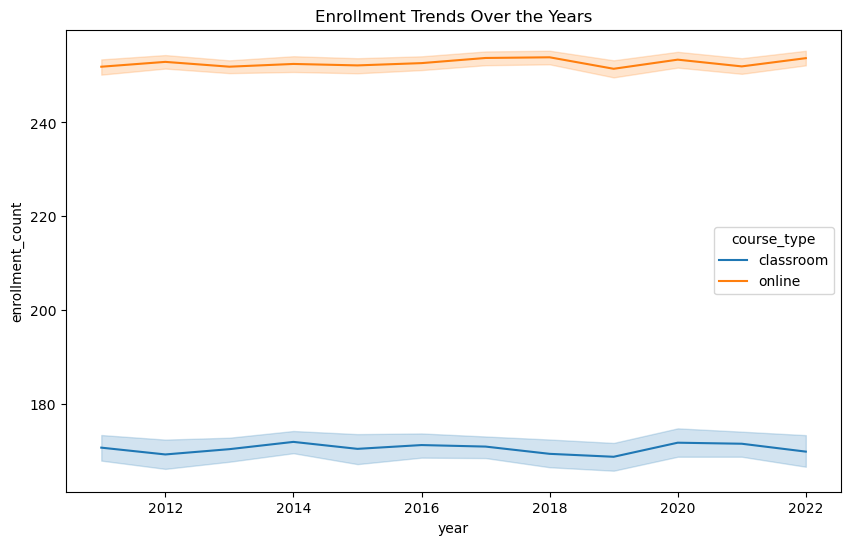

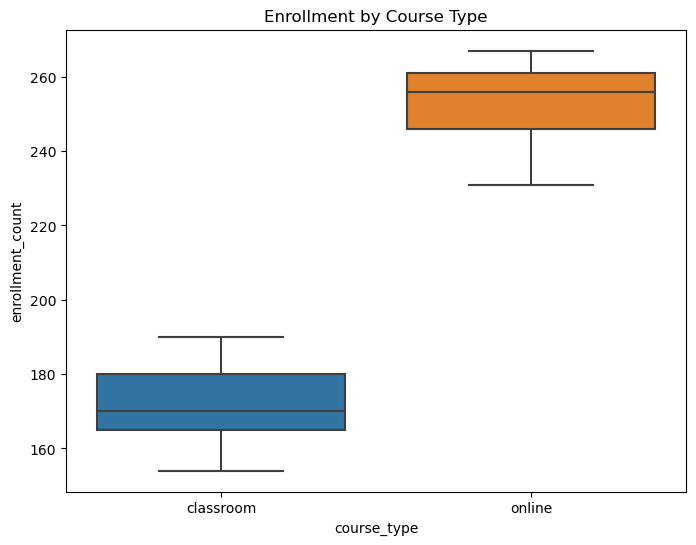

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='year', y='enrollment_count', hue='course_type')
plt.title('Enrollment Trends Over the Years')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='course_type',y='enrollment_count')
plt.title('Enrollment by Course Type')
plt.show()

In [13]:
from scipy.stats import ttest_ind
online_courses = df[df['course_type'] == 'online']['enrollment_count']
classroom_courses=df[df['course_type'] == 'classroom']['enrollment_count']

t_stat, p_value = ttest_ind(online_courses, classroom_courses)
print(f'T-statistics: {t_stat}, p-value: {p_value}')

T-statistics: 177.0383377938837, p-value: 0.0
